GİRİŞ

Bu veri seti, meme kitlelerinden alınan ince iğne aspirasyonu (FNA) görüntülerinden elde edilen hücre çekirdeği özelliklerini içermektedir. Her örnek için hücre çekirdeğinin 30 adet sayısal özelliği hesaplanmıştır. Bu özellikler; yarıçap, doku, çevre uzunluğu, alan, düzgünlük, komplekslik, çukurcukluk, simetri ve fraktal boyut gibi hücresel karakteristikleri kapsamaktadır.

Veri setindeki her örnek, iyi huylu (B - benign) veya kötü huylu (M - malignant) tümör olarak etiketlenmiştir. Toplamda 357 iyi huylu ve 212 kötü huylu tümör örneği bulunmaktadır.

Öncelikle, kullanacağımız kütüphaneleri ekleyelim.

In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Şimdi verimizi okuyalım, ardından adım adım amacımıza doğru ilerleyelim.

In [153]:
data=pd.read_csv("kanserdata.csv")

Şimdi de ilk 5 satıra, head() metodumuzla bakalım.

In [154]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Şimdi sütun adlarını, veriyi daha iyi anlayabilmek için değiştirelim.

In [155]:
data.rename(columns={
    'id': 'Kimlik_numarasi',
    'diagnosis': 'Taninin_turu',
    'radius_mean': 'Ortalama_yaricap',
    'texture_mean': 'Ortalama_doku',
    'perimeter_mean': 'Ortalama_cevre_uzunlugu',
    'area_mean': 'Ortalama_alan',
    'smoothness_mean': 'Ortalama_duzgunluk',
    'compactness_mean': 'Ortalama_kompaktlik',
    'concavity_mean': 'Ortalama_cukurcukluk',
    'concave points_mean': 'Ortalama_cukurcuk_noktalari',
    'symmetry_mean': 'Ortalama_simetri',
    'fractal_dimension_mean': 'Ortalama_fraktal_boyut',
    'radius_se': 'Yaricap_standart_hatasi',
    'texture_se': 'Doku_standart_hatasi',
    'perimeter_se': 'Cevre_uzunlugu_standart_hatasi',
    'area_se': 'Alan_standart_hatasi',
    'smoothness_se': 'Duzgunluk_standart_hatasi',
    'compactness_se': 'Kompaktlik_standart_hatasi',
    'concavity_se': 'Cukurculuk_standart_hatasi',
    'concave points_se': 'Cukurcuk_noktalari_standart_hatasi',
    'symmetry_se': 'Simetri_standart_hatasi',
    'fractal_dimension_se': 'Fraktal_boyut_standart_hatasi',
    'radius_worst': 'En_kotu_yaricap',
    'texture_worst': 'En_kotu_doku',
    'perimeter_worst': 'En_kotu_cevre_uzunlugu',
    'area_worst': 'En_kotu_alan',
    'smoothness_worst': 'En_kotu_duzgunluk',
    'compactness_worst': 'En_kotu_kompaktlik',
    'concavity_worst': 'En_kotu_cukurcukluk',
    'concave points_worst': 'En_kotu_cukurcuk_noktalari',
    'symmetry_worst': 'En_kotu_simetri',
    'fractal_dimension_worst': 'En_kotu_fraktal_boyut',
    'Unnamed: 32': 'Gereksiz_sutun'
}, inplace=True)


Tümör verisinde, iyi huylu olanlar 'B', kötü huylu olanlar ise 'M' harfi ile belirtilmiştir.

Sütun adlarını değiştirdikten sonra, verimizin ilk 5 satırına göz atalım.

In [156]:
data.head()

,Kimlik_numarasi,Taninin_turu,Ortalama_yaricap,Ortalama_doku,Ortalama_cevre_uzunlugu,Ortalama_alan,Ortalama_duzgunluk,Ortalama_kompaktlik,Ortalama_cukurcukluk,Ortalama_cukurcuk_noktalari,...,En_kotu_doku,En_kotu_cevre_uzunlugu,En_kotu_alan,En_kotu_duzgunluk,En_kotu_kompaktlik,En_kotu_cukurcukluk,En_kotu_cukurcuk_noktalari,En_kotu_simetri,En_kotu_fraktal_boyut,Gereksiz_sutun
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Şimdi gereksiz olan sütunları kaldıralım.

In [157]:
data.drop(["Kimlik_numarasi","Gereksiz_sutun"],axis=1,inplace=True)

Şimdi de 'tanının türü' adlı sütunumuzu sayısal veriye çevirelim: İyi huylu olanları (B) 1, kötü huylu olanları (M) ise 0 olarak kodlayalım.

In [158]:
data['Taninin_turu'] = data['Taninin_turu'].map({'B': 1, 'M': 0})

Şimdi tekrar ilk 30 sütunumuzu çağırıp kontrol edelim.

In [159]:
data.head(30)

,Taninin_turu,Ortalama_yaricap,Ortalama_doku,Ortalama_cevre_uzunlugu,Ortalama_alan,Ortalama_duzgunluk,Ortalama_kompaktlik,Ortalama_cukurcukluk,Ortalama_cukurcuk_noktalari,Ortalama_simetri,...,En_kotu_yaricap,En_kotu_doku,En_kotu_cevre_uzunlugu,En_kotu_alan,En_kotu_duzgunluk,En_kotu_kompaktlik,En_kotu_cukurcukluk,En_kotu_cukurcuk_noktalari,En_kotu_simetri,En_kotu_fraktal_boyut
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


Sütunlarımızın tamamı sayısal olduğuna göre, istatistiksel özetlerine bakmak için describe() metoduyla verilerimizi inceleyelim.

In [160]:
data.describe()

,Taninin_turu,Ortalama_yaricap,Ortalama_doku,Ortalama_cevre_uzunlugu,Ortalama_alan,Ortalama_duzgunluk,Ortalama_kompaktlik,Ortalama_cukurcukluk,Ortalama_cukurcuk_noktalari,Ortalama_simetri,...,En_kotu_yaricap,En_kotu_doku,En_kotu_cevre_uzunlugu,En_kotu_alan,En_kotu_duzgunluk,En_kotu_kompaktlik,En_kotu_cukurcukluk,En_kotu_cukurcuk_noktalari,En_kotu_simetri,En_kotu_fraktal_boyut
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Veri kümesinin genel yapısına bakmak için şimdi info() metodunu kullanacağım.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Taninin_turu                        569 non-null    int64  
 1   Ortalama_yaricap                    569 non-null    float64
 2   Ortalama_doku                       569 non-null    float64
 3   Ortalama_cevre_uzunlugu             569 non-null    float64
 4   Ortalama_alan                       569 non-null    float64
 5   Ortalama_duzgunluk                  569 non-null    float64
 6   Ortalama_kompaktlik                 569 non-null    float64
 7   Ortalama_cukurcukluk                569 non-null    float64
 8   Ortalama_cukurcuk_noktalari         569 non-null    float64
 9   Ortalama_simetri                    569 non-null    float64
 10  Ortalama_fraktal_boyut              569 non-null    float64
 11  Yaricap_standart_hatasi             569 non-n

Verimizin tüm sütunları sayısal olduğu için bir sorun yok. Şimdi boş değerlerin olup olmadığını kontrol edelim.

In [162]:
data.isnull().sum()


Taninin_turu                          0
Ortalama_yaricap                      0
Ortalama_doku                         0
Ortalama_cevre_uzunlugu               0
Ortalama_alan                         0
Ortalama_duzgunluk                    0
Ortalama_kompaktlik                   0
Ortalama_cukurcukluk                  0
Ortalama_cukurcuk_noktalari           0
Ortalama_simetri                      0
Ortalama_fraktal_boyut                0
Yaricap_standart_hatasi               0
Doku_standart_hatasi                  0
Cevre_uzunlugu_standart_hatasi        0
Alan_standart_hatasi                  0
Duzgunluk_standart_hatasi             0
Kompaktlik_standart_hatasi            0
Cukurculuk_standart_hatasi            0
Cukurcuk_noktalari_standart_hatasi    0
Simetri_standart_hatasi               0
Fraktal_boyut_standart_hatasi         0
En_kotu_yaricap                       0
En_kotu_doku                          0
En_kotu_cevre_uzunlugu                0
En_kotu_alan                          0


Çok güzel, verilerimizde hiç boş değer yok. Eğer olsaydı, ya ortalama değerlerle dolduracak ya da o satırı silecektik.

In [163]:
data

,Taninin_turu,Ortalama_yaricap,Ortalama_doku,Ortalama_cevre_uzunlugu,Ortalama_alan,Ortalama_duzgunluk,Ortalama_kompaktlik,Ortalama_cukurcukluk,Ortalama_cukurcuk_noktalari,Ortalama_simetri,...,En_kotu_yaricap,En_kotu_doku,En_kotu_cevre_uzunlugu,En_kotu_alan,En_kotu_duzgunluk,En_kotu_kompaktlik,En_kotu_cukurcukluk,En_kotu_cukurcuk_noktalari,En_kotu_simetri,En_kotu_fraktal_boyut
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Şimdi görselleştirme kısmına geçip verimizi daha iyi anlamaya çalışalım

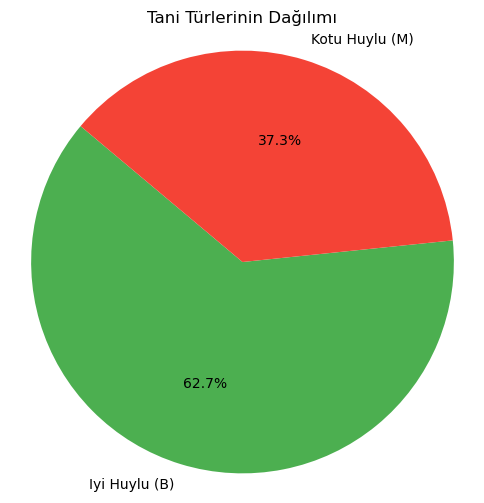

In [164]:

tani_sayilari = data['Taninin_turu'].value_counts()


etiketler = ['Iyi Huylu (B)', 'Kotu Huylu (M)']


plt.figure(figsize=(6, 6))
plt.pie(tani_sayilari, labels=etiketler, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Tani Türlerinin Dağılımı')
plt.axis('equal')
plt.show()


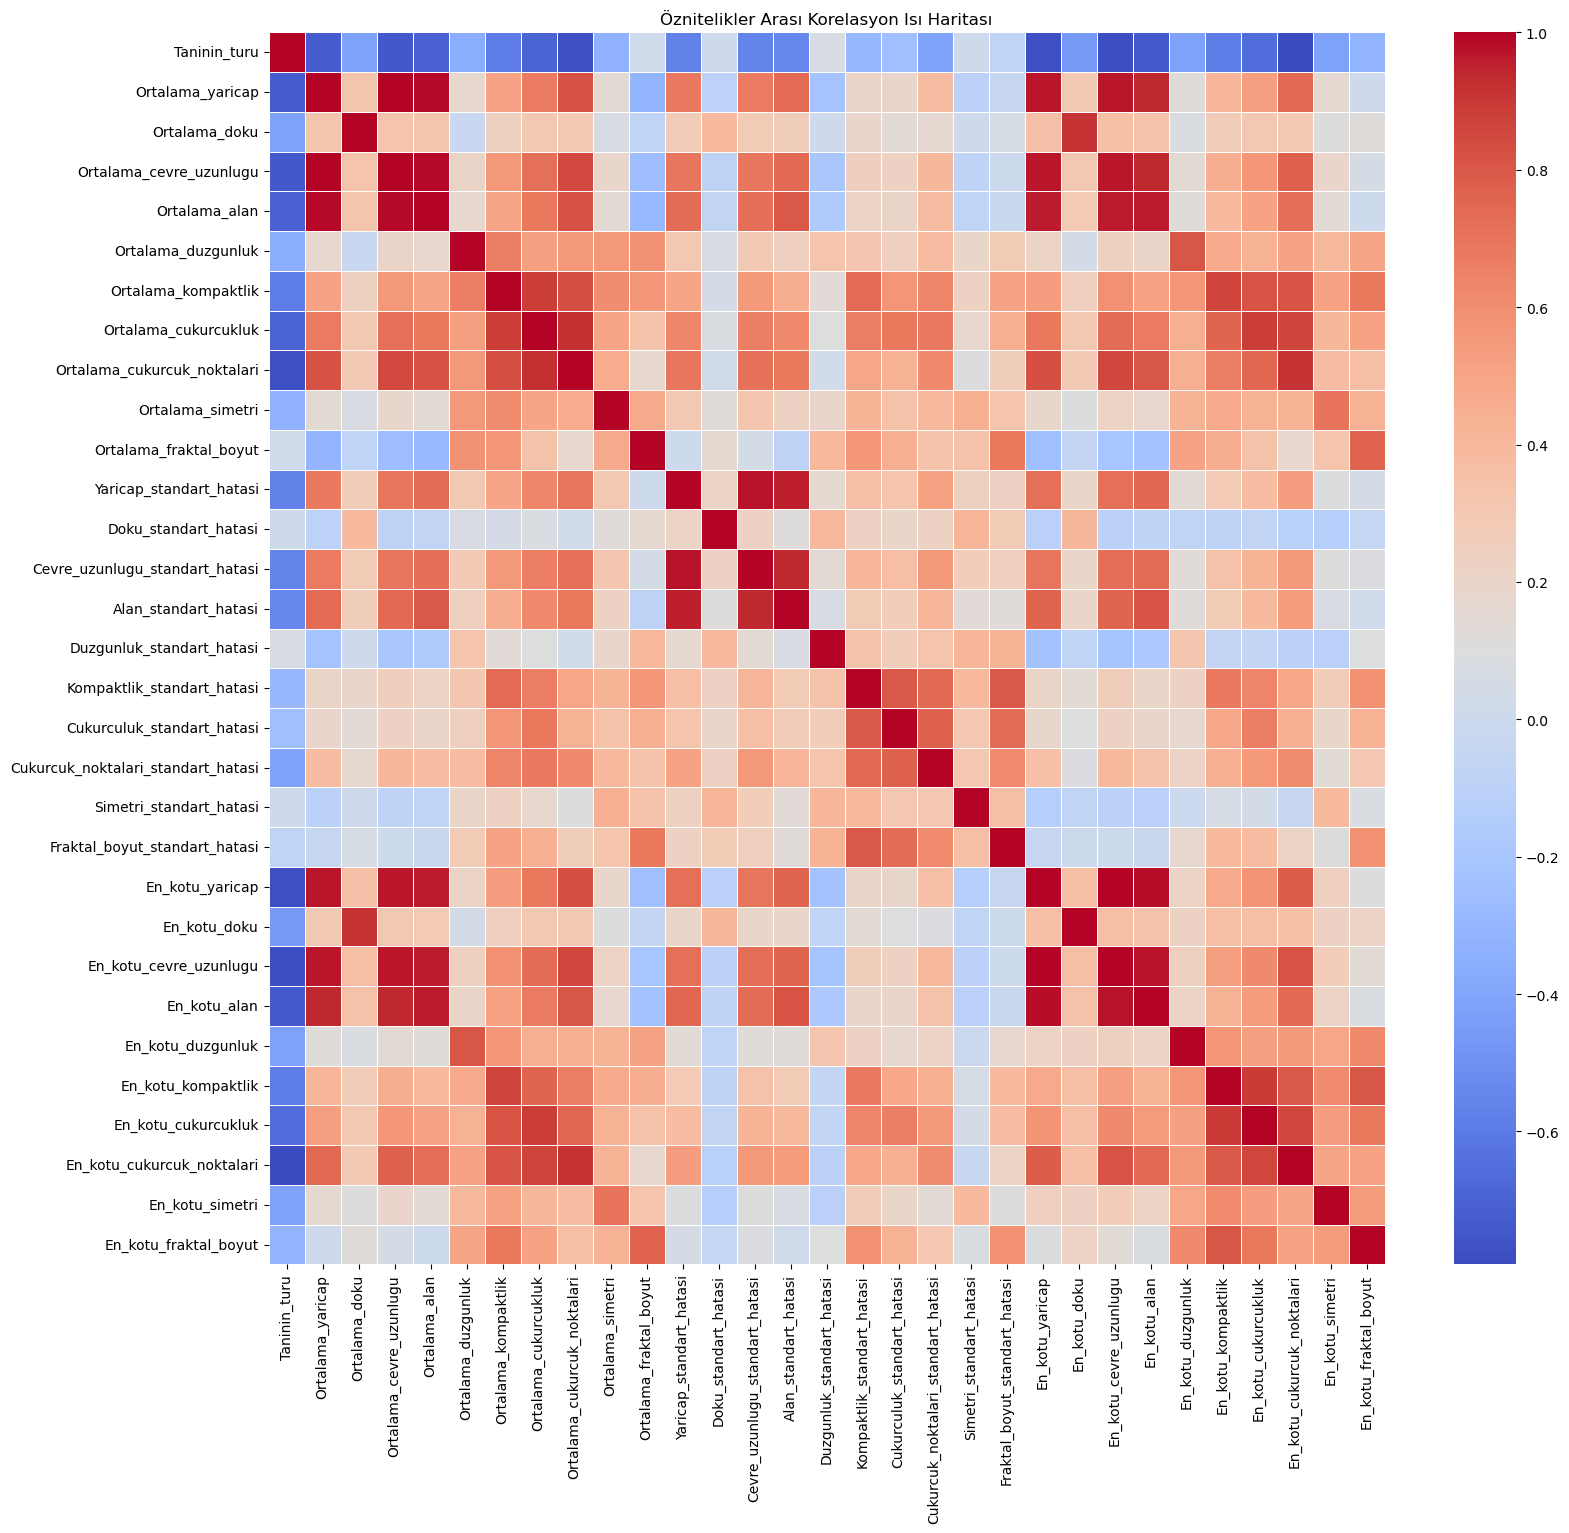

In [165]:

korelasyon = data.corr()


plt.figure(figsize=(18, 16))
sns.heatmap(korelasyon, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Öznitelikler Arası Korelasyon Isı Haritası')
plt.show()


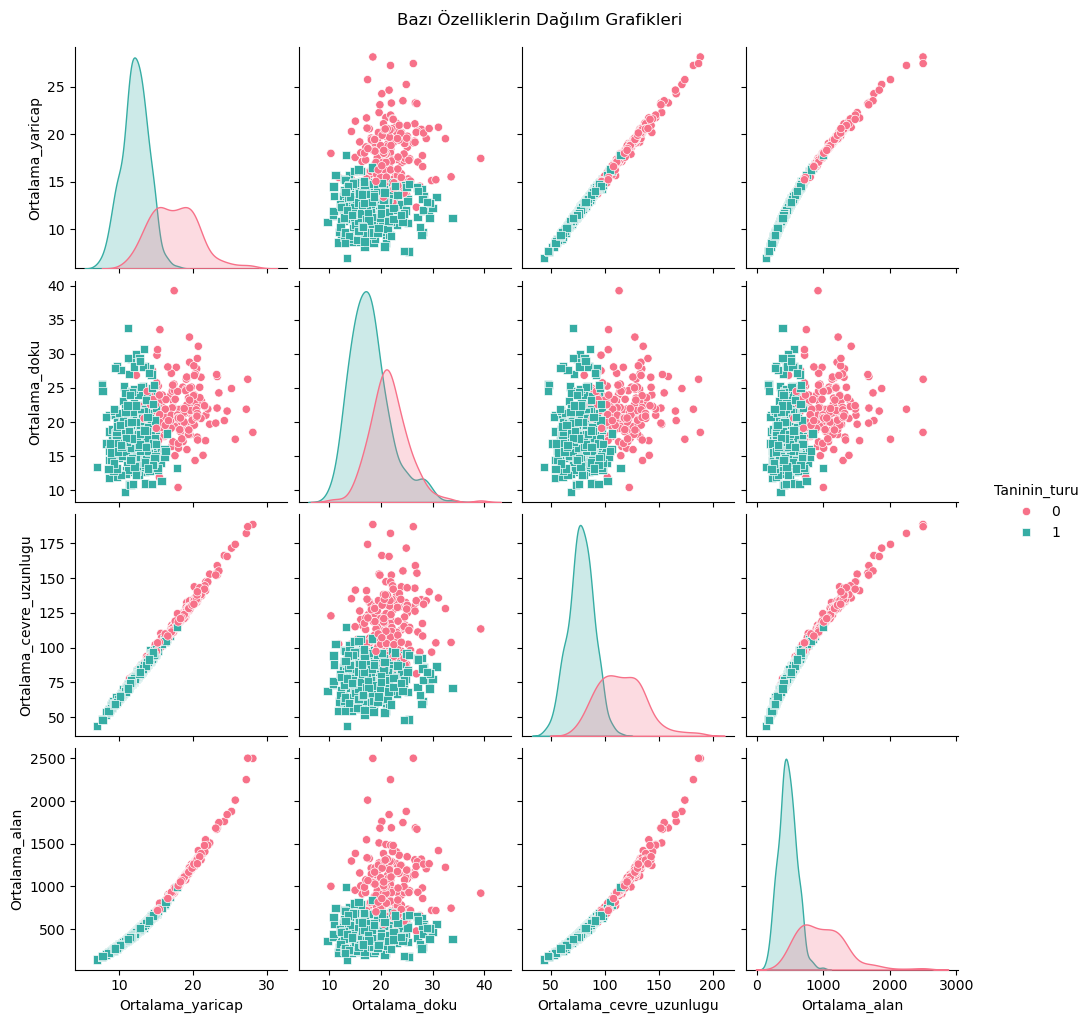

In [166]:

ozellikler = ['Ortalama_yaricap', 'Ortalama_doku', 'Ortalama_cevre_uzunlugu', 'Ortalama_alan', 'Taninin_turu']
sns.pairplot(data[ozellikler], hue='Taninin_turu', palette='husl', markers=['o', 's'])
plt.suptitle("Bazı Özelliklerin Dağılım Grafikleri", y=1.02)
plt.show()


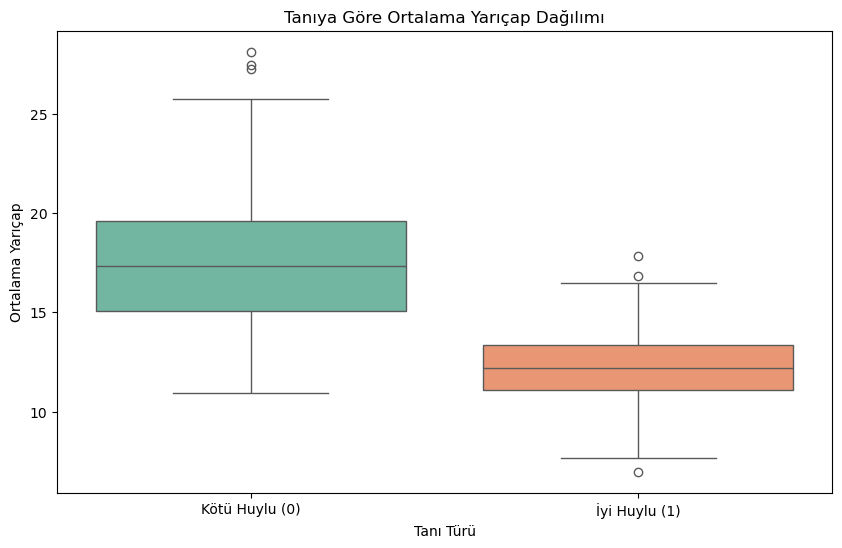

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Taninin_turu', y='Ortalama_yaricap', hue='Taninin_turu', data=data, palette='Set2', legend=False)
plt.xticks([0, 1], ['Kötü Huylu (0)', 'İyi Huylu (1)'])
plt.title('Tanıya Göre Ortalama Yarıçap Dağılımı')
plt.xlabel('Tanı Türü')
plt.ylabel('Ortalama Yarıçap')
plt.show()


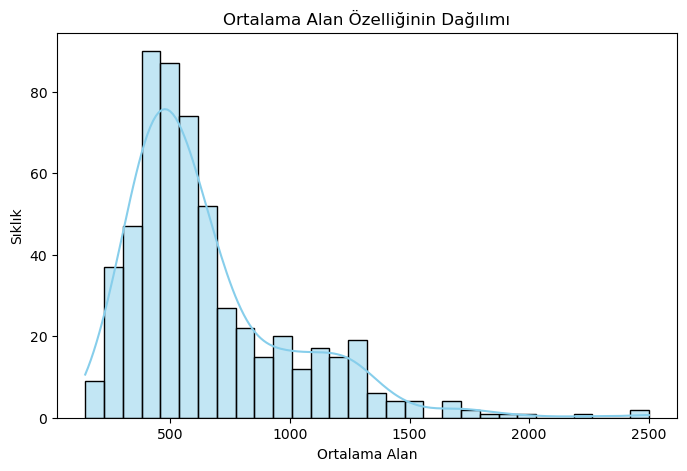

In [168]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Ortalama_alan', kde=True, bins=30, color='skyblue')
plt.title('Ortalama Alan Özelliğinin Dağılımı')
plt.xlabel('Ortalama Alan')
plt.ylabel('Sıklık')
plt.show()


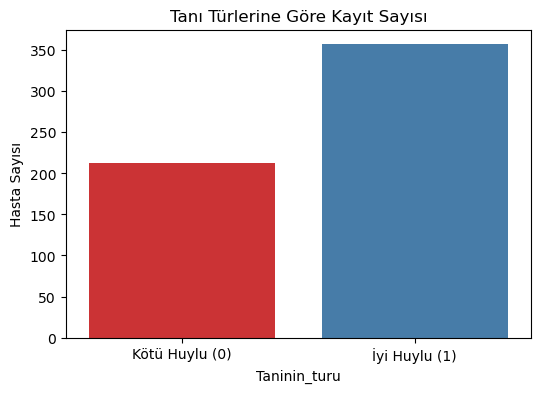

In [169]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Taninin_turu', data=data, hue='Taninin_turu', palette='Set1', legend=False)
plt.xticks([0, 1], ['Kötü Huylu (0)', 'İyi Huylu (1)'])
plt.title('Tanı Türlerine Göre Kayıt Sayısı')
plt.ylabel('Hasta Sayısı')
plt.show()


Verimi temizledin  ve gereksiz sütunları kaldırdım . Tanı türlerini sayısal değerlere dönüştürülerek model için uygun hale getirdim. Veri üzerinde ön işleme adımlarını güzel bir şekilde  tamamlandım. Ayrıca, verinin genel yapısını ve tanı türlerine göre önemli değişkenlerin dağılımını anlamak için veri görselleştirme yaptım . Bu aşamalar, model eğitimi öncesi veri keşfi ve hazırlık sürecinin temelini oluşturdu şimdide modelimi eğitip gerekli tahminleri yapacam .

Şimdi gerekli kütüphanelerimizi ekleyelim.

In [170]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Şimdi de X ve Y değerlerimizi tanımlayalım.

In [171]:
y=data.Taninin_turu.values
x=data.drop(["Taninin_turu"],axis=1)


Verileri aynı ölçeğe getirerek, farklı büyüklükteki özelliklerin modellemeyi etkilememesi için X değişkeninde normalizasyon uyguladım.

In [172]:
x = (x - x.min()) / (x.max() - x.min())

Verimi eğitim ve test setleri olarak ayırdım; %80’ini eğitim, %20’sini ise test için kullanacağım.

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Şimdi 6 farklı modeli deneyeceğiz. En iyi sonucu veren modeli seçeceğiz.

1.Logistic regression

In [174]:
from sklearn.linear_model import LogisticRegression
lrdegisken=LogisticRegression()
lrdegisken.fit(x_train,y_train)
tahminler=(lrdegisken.score(x_test,y_test))*100

print("logistic regression modelinin doğruluk oranı= {:.2f}%".format(tahminler))

logistic regression modelinin doğruluk oranı= 98.25%


2.knn  

In [175]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train)

tahmin_knn = knn.score(x_test, y_test) * 100
print("KNN modelinin doğruluk oranı = {:.2f}%".format(tahmin_knn))

KNN modelinin doğruluk oranı = 96.49%


3.Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


tahmin_dtree = dtree.score(x_test, y_test) * 100
print("Decision Tree doğruluk oranı = {:.2f}%".format(tahmin_dtree))

Decision Tree doğruluk oranı = 94.74%


4.Random Forest 

In [177]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(x_train, y_train)
tahmin_rforest = rforest.score(x_test, y_test) * 100
print("Random Forest doğruluk oranı = {:.2f}%".format(tahmin_rforest))

Random Forest doğruluk oranı = 96.49%


5.svc

In [178]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)
tahmin_svc = svc_model.score(x_test, y_test) * 100
print("SVC doğruluk oranı = {:.2f}%".format(tahmin_svc))


SVC doğruluk oranı = 97.37%


6.Naive bayes 

In [179]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
tahmin_nb = nb_model.score(x_test, y_test) * 100
print("Naive Bayes doğruluk oranı = {:.2f}%".format(tahmin_nb))

Naive Bayes doğruluk oranı = 96.49%


In [180]:
print("\nModel Karşılaştırması:")
print("logistic regression modelinin doğruluk oranı  = {:.2f}%".format(tahminler))
print("KNN modelinin doğruluk oranı = {:.2f}%".format(tahmin_knn))
print("Decision Tree doğruluk oranı = {:.2f}%".format(tahmin_dtree))
print("Random Forest doğruluk oranı = {:.2f}%".format(tahmin_rforest))
print("SVC doğruluk oranı = {:.2f}%".format(tahmin_svc))
print("Naive Bayes doğruluk oranı = {:.2f}%".format(tahmin_nb))



Model Karşılaştırması:
logistic regression modelinin doğruluk oranı  = 98.25%
KNN modelinin doğruluk oranı = 96.49%
Decision Tree doğruluk oranı = 94.74%
Random Forest doğruluk oranı = 96.49%
SVC doğruluk oranı = 97.37%
Naive Bayes doğruluk oranı = 96.49%


En yüksek doğruluk oranı Logistic Regression modelinde elde edildiği için, Logistic Regression'ın confusion matrix'ini gösterelim.

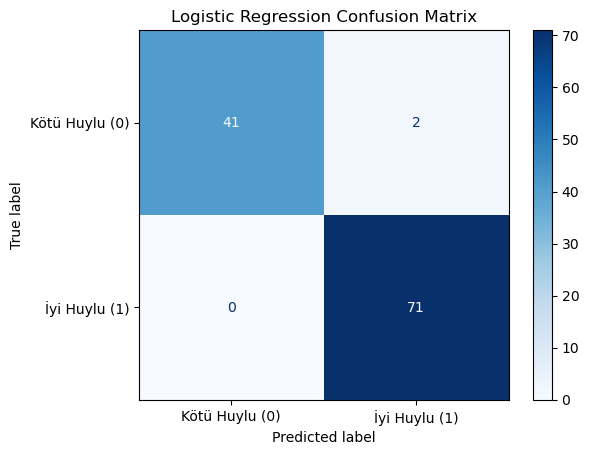

In [181]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = lrdegisken.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kötü Huylu (0)', 'İyi Huylu (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()
